Read in libraries 

In [1]:
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)
library("ggplot2")
install.packages("ggpubr")
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose





The downloaded binary packages are in
	/var/folders/d3/vjc_50q165z6232gypbw3sq40000gp/T//RtmpFauEnx/downloaded_packages


In [2]:
setwd("/Users/sy3115/Desktop/figures")

Read in the files

In [3]:
suspicious_indels_10bp_df_1 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_SuspiciousIndels.lt50bp.csv")
suspicious_indels_20bp_df_1 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_SuspiciousIndels.lt50bp.csv")
suspicious_indels_30bp_df_1 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_SuspiciousIndels.lt50bp.csv")
suspicious_indels_40bp_df_1 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_SuspiciousIndels.lt50bp.csv")

suspicious_indels_10bp_df_2 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp10_SuspiciousIndels.lt50bp.csv")
suspicious_indels_20bp_df_2 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp20_SuspiciousIndels.lt50bp.csv")
suspicious_indels_30bp_df_2 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp30_SuspiciousIndels.lt50bp.csv")
suspicious_indels_40bp_df_2 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp40_SuspiciousIndels.lt50bp.csv")

df_1 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv")
df_2 = fread("/Users/sy3115/Library/CloudStorage/OneDrive-ColumbiaUniversityIrvingMedicalCenter/rAF_scripts_and_inputs/PublicationReady_Data/IGM/2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv")


Split varID 

In [4]:
## split varID 
suspicious_indels_10bp_df_1 = suspicious_indels_10bp_df_1 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
suspicious_indels_20bp_df_1 = suspicious_indels_20bp_df_1 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
suspicious_indels_30bp_df_1 = suspicious_indels_30bp_df_1 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
suspicious_indels_40bp_df_1 = suspicious_indels_40bp_df_1 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))

suspicious_indels_10bp_df_2 = suspicious_indels_10bp_df_2 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
suspicious_indels_20bp_df_2 = suspicious_indels_20bp_df_2 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
suspicious_indels_30bp_df_2 = suspicious_indels_30bp_df_2 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
suspicious_indels_40bp_df_2 = suspicious_indels_40bp_df_2 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))

df_1 = df_1 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))
df_2 = df_2 %>% separate(VarID, c("CHR", "POS", "REF", "ALT"))


Set bp ranges, dataframes and rare. 

In [5]:
# set bp ranges
bp_range = c("10", "20", "30", "40")

In [6]:
df_name_1="gnomAD"
df_name_2="IGM"

In [7]:
# chromosomes to analyze 
chroms = c("X", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "Y")

In [8]:
## make chroms an ordered factor 
chroms <- factor (chroms, levels = chroms)

In [9]:
rare = 10^-4 

Calculate percentage of rare indels that are suspicious across each chromosomes.

In [10]:
for (i in bp_range) {
  ## get sus for that bp range data frame 
  df_1_sus = paste0("suspicious_indels_", i, "bp_df_1")
  df_2_sus = paste0("suspicious_indels_", i, "bp_df_2")
  
  ## filter for suspicious indels within each chromosome 
  for (j in chroms) {
    df_1_sus_chrom = paste0("df_1_sus_chrom_", j, "_bp_", i)
    df_2_sus_chrom = paste0("df_2_sus_chrom_", j, "_bp_", i)
    
    assign(df_1_sus_chrom, nrow(get(df_1_sus) %>% filter(CHR == j)))
    assign(df_2_sus_chrom, nrow(get(df_2_sus) %>% filter(CHR == j)))
  
  ## filter for rare sAF indels within each chromosome 
    df_1_rare_chrom = paste0("df_1_rare_chrom_", j, "_bp_", i)
    df_2_rare_chrom = paste0("df_2_rare_chrom_", j, "_bp_", i)
    
    assign(df_1_rare_chrom, nrow(df_1 %>% filter(sAF <= rare) %>% filter(CHR == j)))
    assign(df_2_rare_chrom, nrow(df_2 %>% filter(sAF <= rare) %>% filter(CHR == j)))
    
  ## find percentage of sus/rare * 100
    df_1_prct = paste0("df_1_prct_chrom", j, "_bp_", i)
    df_2_prct = paste0("df_2_prct_chrom", j, "_bp_", i)
    
    assign(df_1_prct, get(df_1_sus_chrom)/get(df_1_rare_chrom) * 100 )
    assign(df_2_prct, get(df_2_sus_chrom)/get(df_2_rare_chrom) * 100 )
    
    
  }
  
  ## make a list for graph data frame 
  df_1_list = paste0("df_1_list_bp", i)
  df_2_list = paste0("df_2_list_bp", i)
  
  assign(df_1_list, c())
  assign(df_2_list, c())
    
  for (k in chroms) {
    ## get variable 
   get_temp_df1 = paste0("df_1_prct_chrom", k, "_bp_", i)
   get_temp_df2 = paste0("df_2_prct_chrom", k, "_bp_", i)
   
   assign(df_1_list, c(get(df_1_list), get(get_temp_df1)))
   assign(df_2_list, c(get(df_2_list), get(get_temp_df2)))
  }
}


Make graphs. 

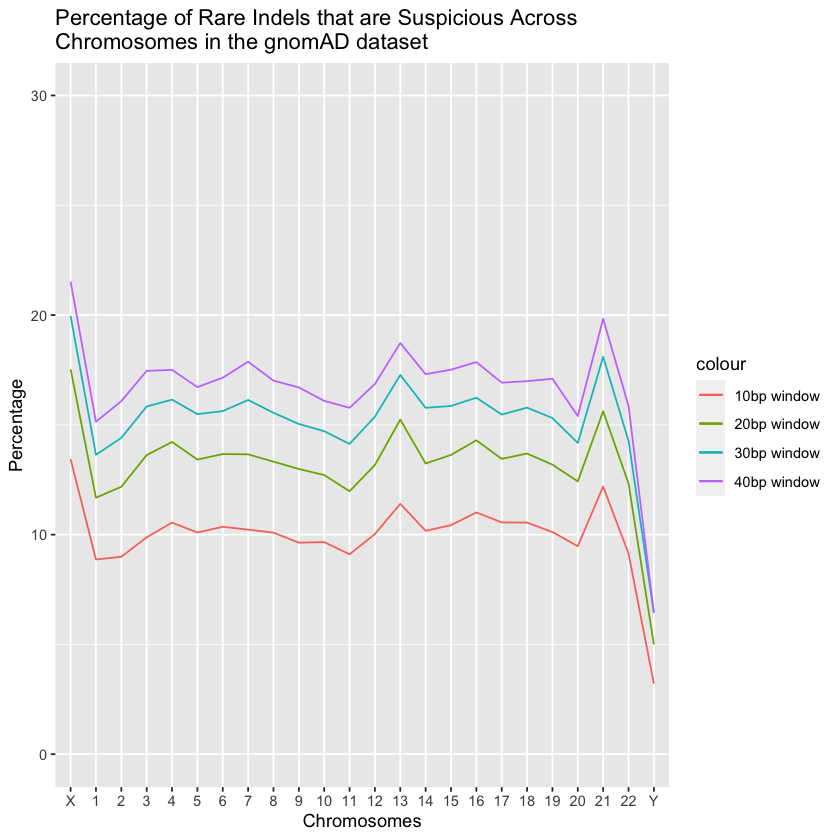

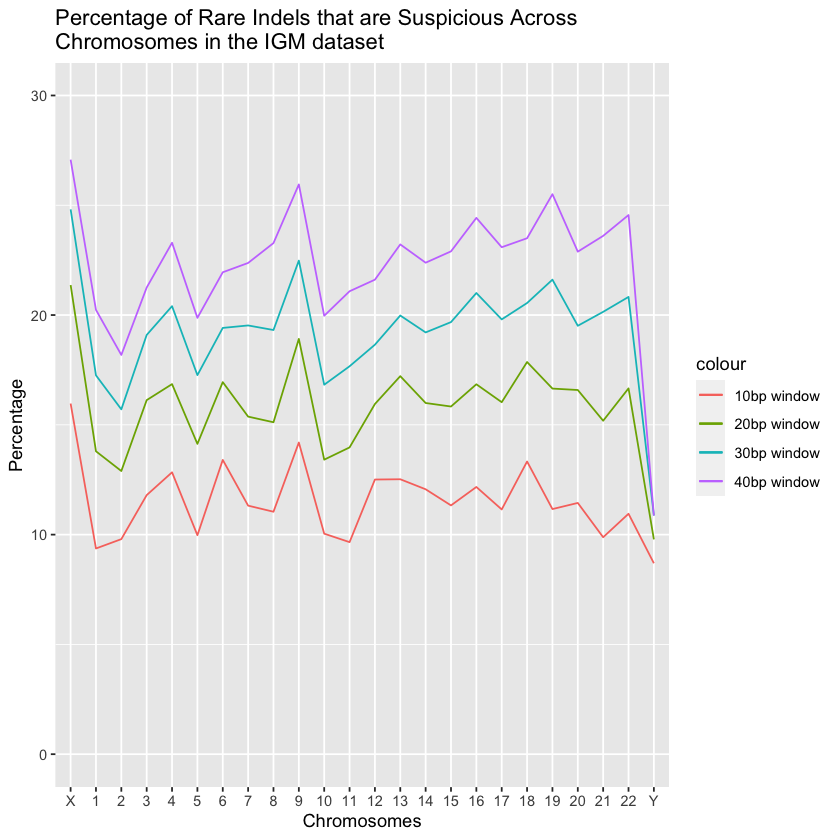

In [11]:
sus_chr_distr_df1 = data.frame(x = chroms, y1 = df_1_list_bp10, y2 = df_1_list_bp20, y3 = df_1_list_bp30, y4 = df_1_list_bp40)

sus_chr_distr_df2 = data.frame(x = chroms, y1 = df_2_list_bp10, y2 = df_2_list_bp20, y3 = df_2_list_bp30, y4 = df_2_list_bp40)

sus_chr_distr_plot1 = ggplot(sus_chr_distr_df1, aes(x)) +
  geom_line(aes(y = y1, color = "10bp window"), group = 1) +
  geom_line(aes(y = y2, color = "20bp window"), group = 1) +
  geom_line(aes(y = y3, color = "30bp window"), group = 1) +
  geom_line(aes(y = y4, color = "40bp window"), group = 1) + 
  ylim (0, 30) +
  labs (title = str_wrap(paste0("Percentage of Rare Indels that are Suspicious Across Chromosomes in the ", df_name_1, " dataset"), width = 60),
        x = "Chromosomes",
        y = "Percentage") 

sus_chr_distr_plot2 = ggplot(sus_chr_distr_df2, aes(x)) +
  geom_line(aes(y = y1, color = "10bp window"), group = 1) +
  geom_line(aes(y = y2, color = "20bp window"), group = 1) +
  geom_line(aes(y = y3, color = "30bp window"), group = 1) +
  geom_line(aes(y = y4, color = "40bp window"), group = 1) +
  ylim (0,30) +
  labs (title = str_wrap(paste0("Percentage of Rare Indels that are Suspicious Across Chromosomes in the ", df_name_2, " dataset"), width = 60),
        x = "Chromosomes",
        y = "Percentage")

sus_chr_distr_plot1
sus_chr_distr_plot2

Compile graphs into one graph.

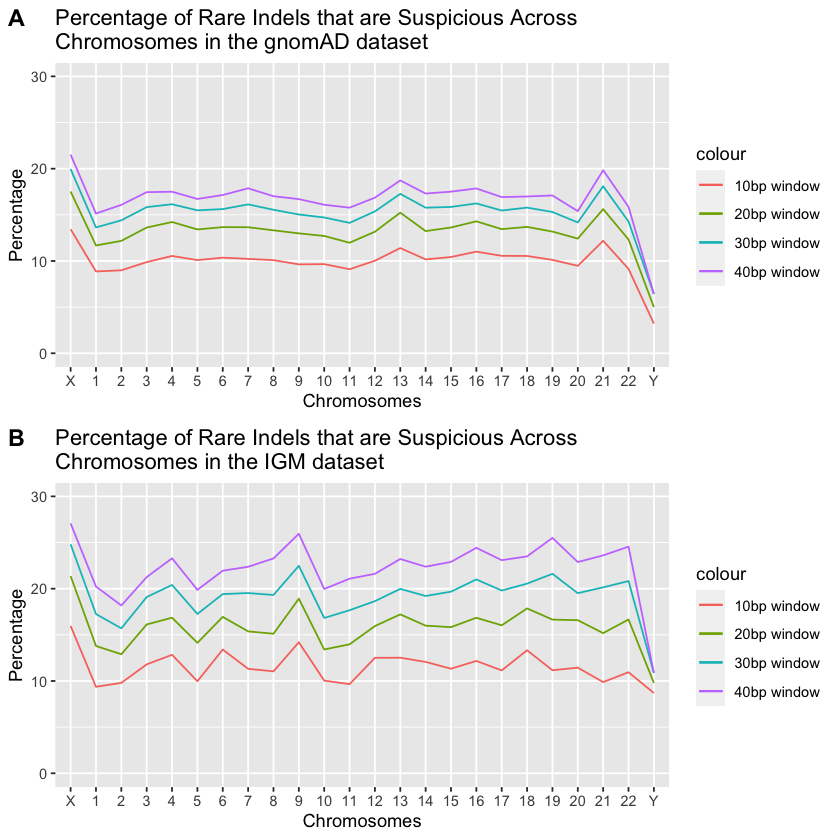

In [12]:
summary_graph = ggarrange(sus_chr_distr_plot1, sus_chr_distr_plot2, labels = c("A", "B"), ncol = 1, nrow = 2)


summary_graph

In [13]:
ggsave("FigS1.jpg", width = 80, height = 60, units = c("cm"), dpi = 300)